In [2]:
import numpy as nm
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
#checking if there is any null value

In [5]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#description of the data 

In [6]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
#get a count of number of patients with and without a heart disease

In [9]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [10]:
#information of dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

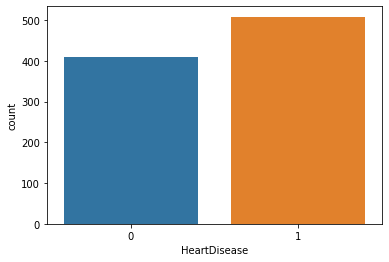

In [8]:
sns.countplot(x ='HeartDisease', data = data)

In [26]:
data['HeartDisease'] = data.pop('HeartDisease')

In [27]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,...,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,HeartDisease
0,40,140,289,0,172,0.0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
1,49,160,180,0,156,1.0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,54,150,195,0,122,0.0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0


In [28]:
#splitting of data into training and testing data

In [29]:
x = data.iloc[:,:-1].values
y = data['HeartDisease']

In [30]:
len(x)

918

In [31]:
len(y)

918

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30)

In [33]:
#normalization of data to get the accuracy

In [34]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
#using knn classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
x_test

array([[-1.61091425, -1.26571037,  0.7724388 , ...,  4.04368042,
        -0.98761562, -0.90197523],
       [-0.76476416, -0.1540255 ,  0.30139672, ..., -0.24729946,
        -0.98761562,  1.10867789],
       [ 0.50446098, -1.0433734 ,  1.04028625, ...,  4.04368042,
        -0.98761562, -0.90197523],
       ...,
       [ 0.29292345,  0.23506421,  0.70778596, ..., -0.24729946,
         1.01253967, -0.90197523],
       [-0.13015159,  2.18051274, -0.05881192, ..., -0.24729946,
        -0.98761562,  1.10867789],
       [ 1.45637983, -0.70986793,  0.21827165, ..., -0.24729946,
         1.01253967, -0.90197523]])

In [40]:
y_pred = classifier.predict(x_test)

In [41]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [42]:
cm= confusion_matrix(y_test, y_pred)

In [43]:
cm

array([[ 87,  17],
       [ 21, 151]], dtype=int64)

In [44]:
accuracy_score(y_test, y_pred)

0.8623188405797102

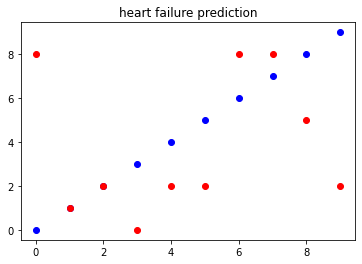

In [49]:
def plotGraph(y_test,y_pred,knntitle):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(knntitle)
    plt.show()
    return


y_test = range(10)
y_pred = nm.random.randint(0, 10, 10)

plotGraph(y_test, y_pred, "heart failure prediction")

In [ ]:
# plt.scatter(range(len(x_train)), x_train, color='blue')
# plt.scatter(range(len(y_train)), y_train, color='red')
# plt.xlabel('X_train')
# plt.ylabel('Y_train')
# plt.title('Heart failure prediction using training data')

# plt.show()

In [ ]:
# plt.scatter(range(len(x_test)), x_test, color='blue')
# plt.scatter(range(len(y_test)), y_test, color='red')
# plt.xlabel('X_test')
# plt.ylabel('Y_test')
# plt.title('Heart failure prediction using testing data')

# plt.show()

In [1]:
#using naive bayes classifier

In [35]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [36]:
y_pred = classifier.predict(x_test)

In [37]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [38]:
output = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(output)
output1 = accuracy_score(y_test, y_pred)
print("Accuracy:")
print(output1)

confusion matrix:
[[106  20]
 [ 16 134]]
Accuracy:
0.8695652173913043


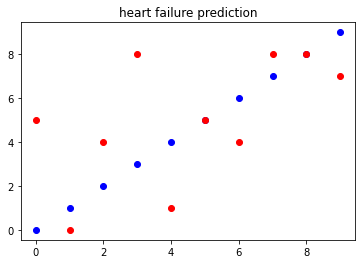

In [43]:
def plotGraph(y_test,y_pred,knntitle):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(knntitle)
    plt.show()
    return


y_test = range(10)
y_pred = nm.random.randint(0, 10, 10)

plotGraph(y_test, y_pred, "heart failure prediction")

In [39]:
#decisiontree classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [42]:
output = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(output)
output1 = accuracy_score(y_test, y_pred)
print("Accuracy:")
print(output1)

confusion matrix:
[[104  22]
 [ 29 121]]
Accuracy:
0.8152173913043478


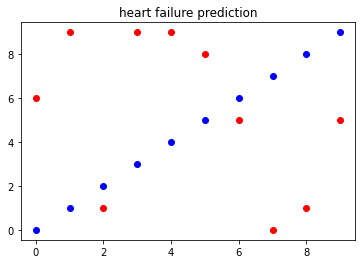

In [44]:
def plotGraph(y_test,y_pred,knntitle):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(knntitle)
    plt.show()
    return


y_test = range(10)
y_pred = nm.random.randint(0, 10, 10)

plotGraph(y_test, y_pred, "heart failure prediction")